# Load Dataset

In [1]:
!pip install kaggle

In [17]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d dhanushnarayananr/credit-card-fraud

Dataset URL: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud
License(s): CC0-1.0
  0% 0.00/28.9M [00:00<?, ?B/s]
100% 28.9M/28.9M [00:00<00:00, 369MB/s]


In [5]:
!unzip credit-card-fraud.zip

Archive:  credit-card-fraud.zip
  inflating: card_transdata.csv      


## Prepare Data

In [6]:
import pandas as pd
import os

df = pd.read_csv('card_transdata.csv')
print(df.head())

extracted_files = [file for file in os.listdir() if file.endswith('.csv')]
for file in extracted_files:
    os.remove(file)
if os.path.exists('credit-card-fraud.zip'):
    os.remove('credit-card-fraud.zip')

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  


In [18]:
df_sample = df.sample(5)
print(df_sample.transpose())

                                  960143    361691     155816     329703  \
distance_from_home              6.727655  5.510540  26.303616  28.620296   
distance_from_last_transaction  0.060053  6.321274   0.413769   1.422131   
ratio_to_median_purchase_price  7.007918  0.455401   0.631691   0.609567   
repeat_retailer                 1.000000  1.000000   1.000000   1.000000   
used_chip                       1.000000  0.000000   1.000000   0.000000   
used_pin_number                 0.000000  0.000000   0.000000   0.000000   
online_order                    1.000000  0.000000   1.000000   1.000000   
fraud                           1.000000  0.000000   0.000000   0.000000   

                                  462868  
distance_from_home              2.744154  
distance_from_last_transaction  0.569444  
ratio_to_median_purchase_price  0.980441  
repeat_retailer                 1.000000  
used_chip                       1.000000  
used_pin_number                 0.000000  
online_order  

In [8]:
print(df.isnull().sum()) #Check for null values

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
None


In [10]:
print(df['fraud'].value_counts())

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


In [13]:
import pandas as pd
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Check the class distribution
print("Original Class Distribution:")
print(df['fraud'].value_counts())

# Separate fraud and non-fraud cases
fraud_cases = df[df['fraud'] == 1.0]
non_fraud_cases = df[df['fraud'] == 0.0]

# Undersample the majority class (non-fraud)
# Reduce non-fraud cases to match the number of fraud cases
non_fraud_sampled = resample(non_fraud_cases,
                             replace=False,              # No replacement
                             n_samples=len(fraud_cases), # Match the number of fraud cases
                             random_state=42)

# Combine undersampled non-fraud and original fraud cases
combined_df = pd.concat([non_fraud_sampled, fraud_cases], axis=0)

# Shuffle the dataset
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Apply SMOTE to the combined dataset
X = combined_df.drop(columns=['fraud'])
y = combined_df['fraud']

smote = SMOTE(sampling_strategy='auto', random_state=42)  # Balance both classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['fraud'] = y_resampled

# Verify the new class distribution
print("Balanced Class Distribution:")
print(balanced_df['fraud'].value_counts())


Original Class Distribution:
fraud
0.0    912597
1.0     87403
Name: count, dtype: int64
Balanced Class Distribution:
fraud
0.0    87403
1.0    87403
Name: count, dtype: int64


# Data Visualization

<ipython-input-14-4042422186>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_df, x='fraud', palette='Set2')


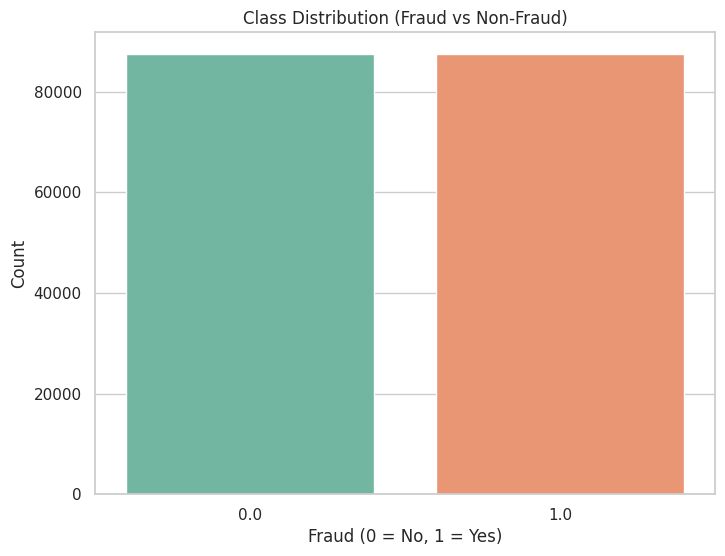

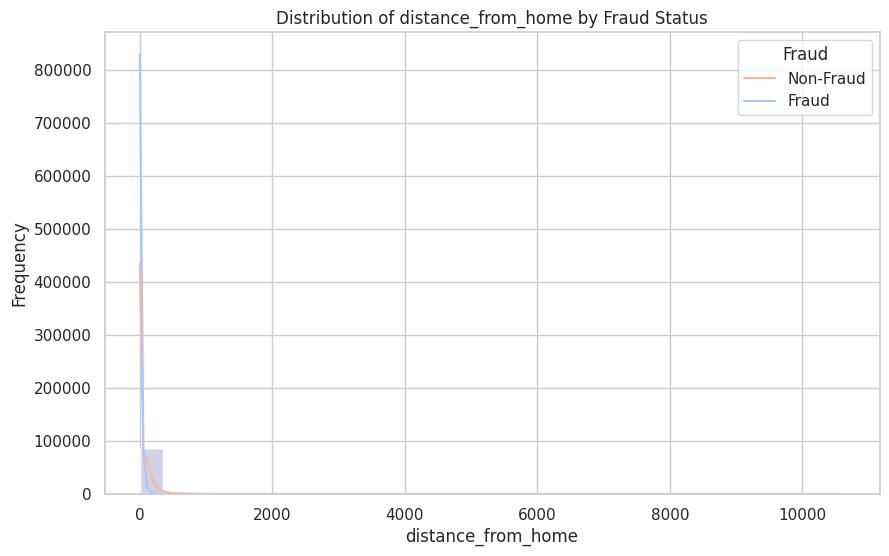

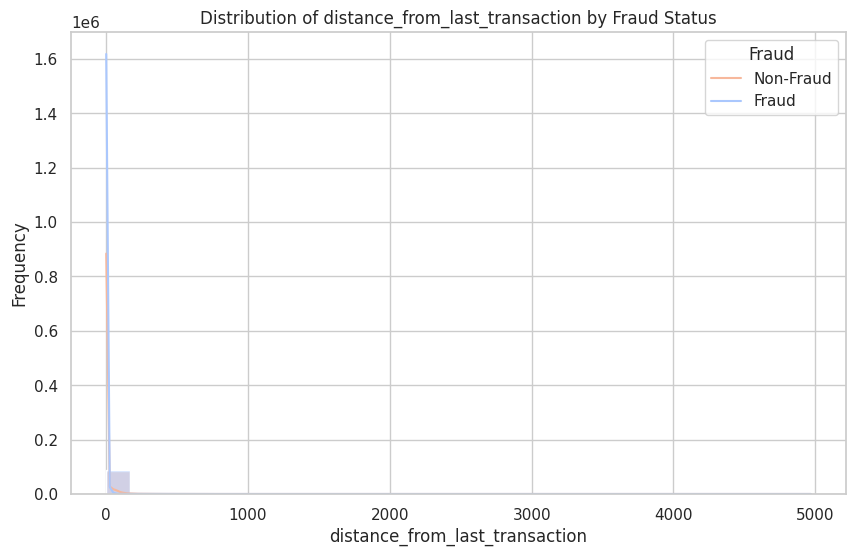

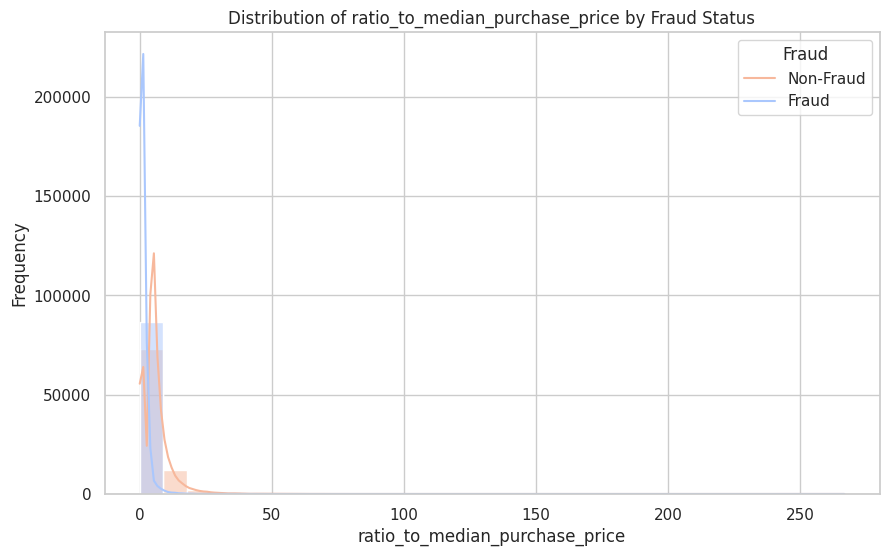

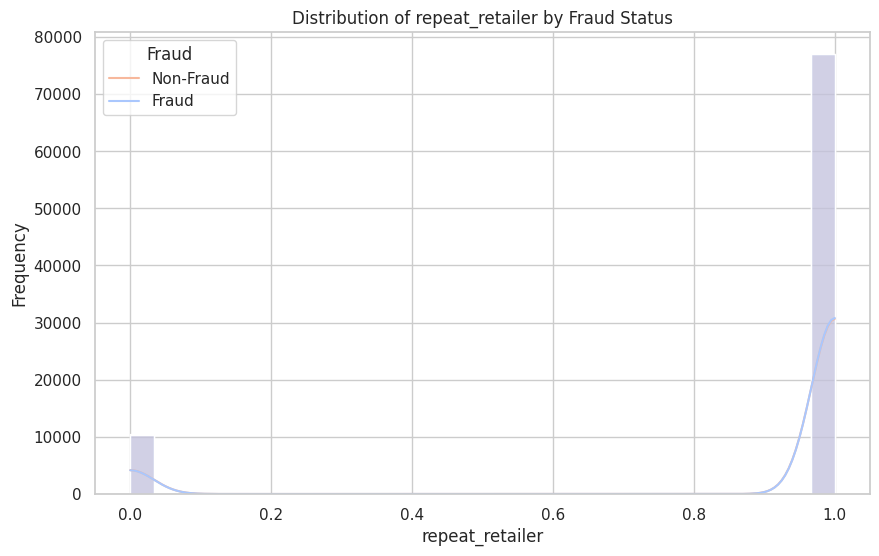

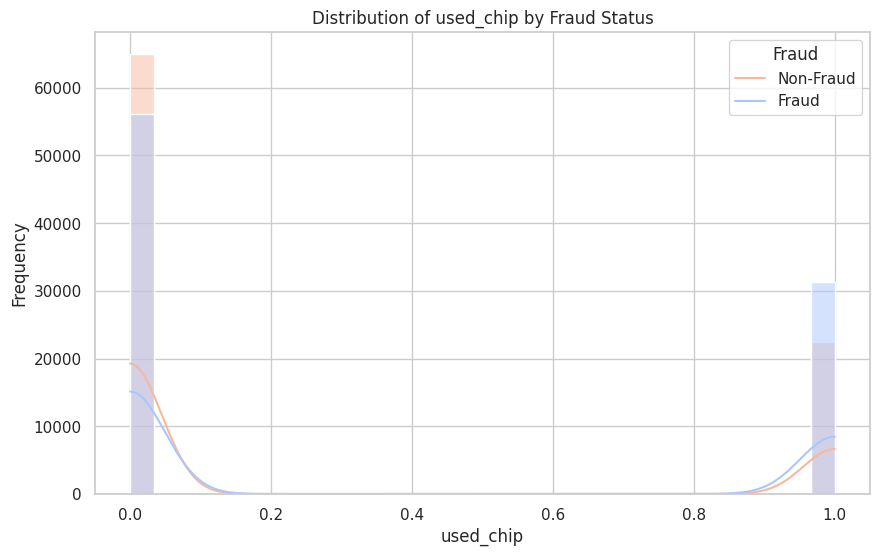

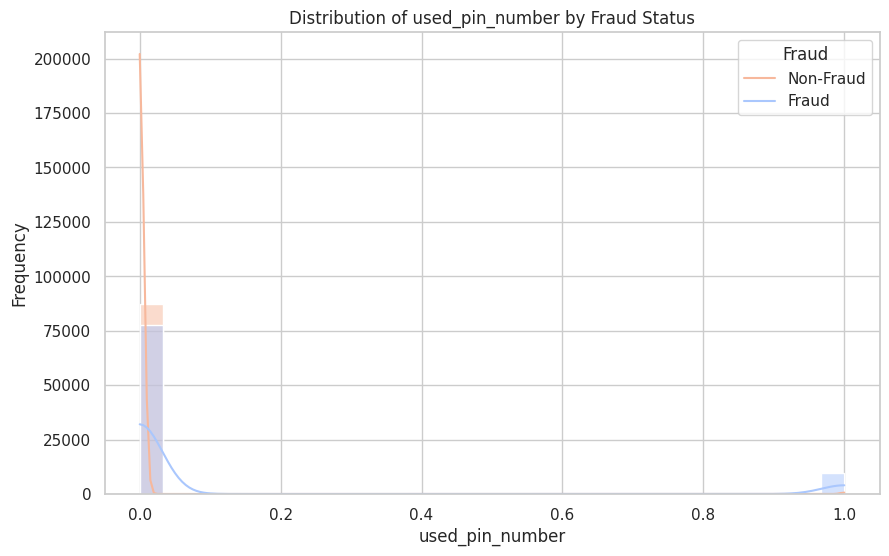

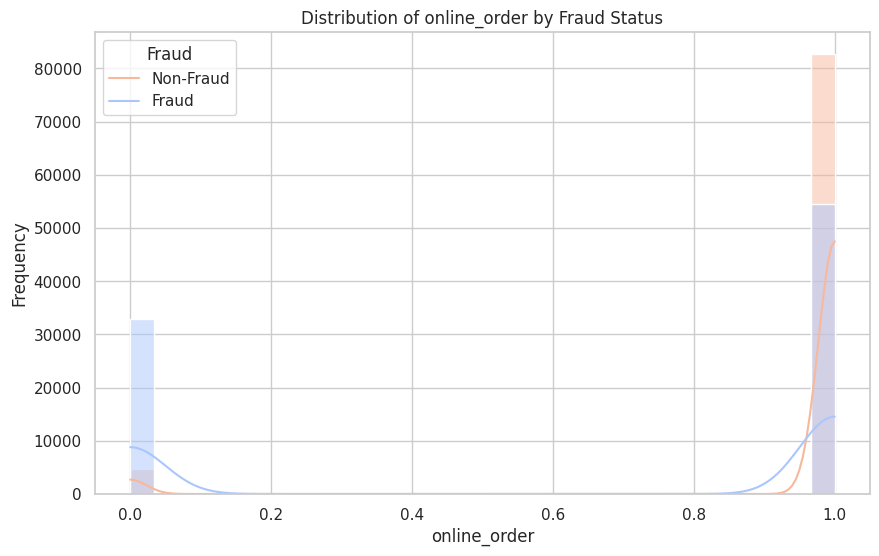

<ipython-input-14-4042422186>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=balanced_df, x='fraud', y=feature, palette='Set2')


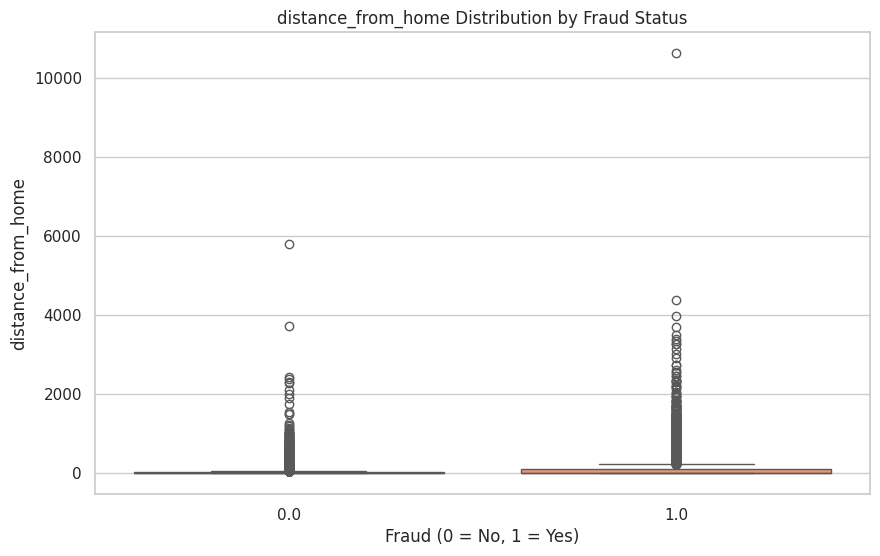

<ipython-input-14-4042422186>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=balanced_df, x='fraud', y=feature, palette='Set2')


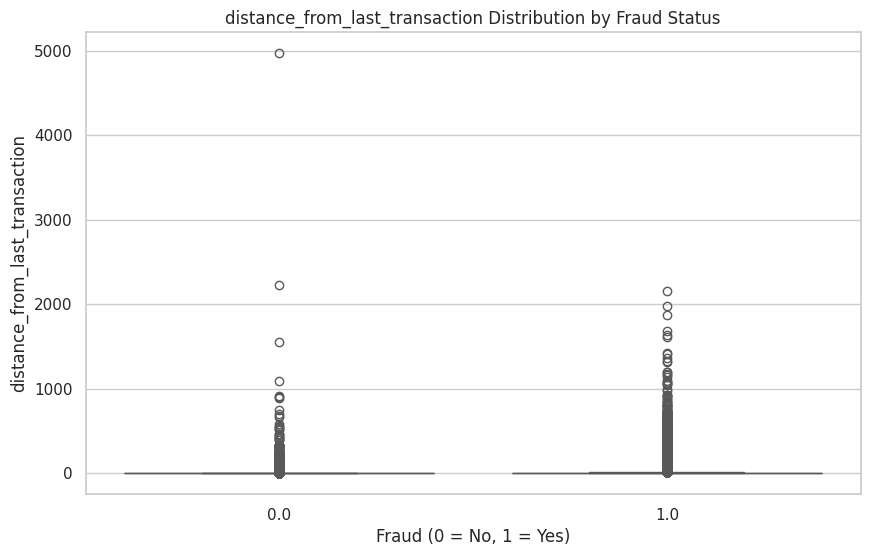

<ipython-input-14-4042422186>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=balanced_df, x='fraud', y=feature, palette='Set2')


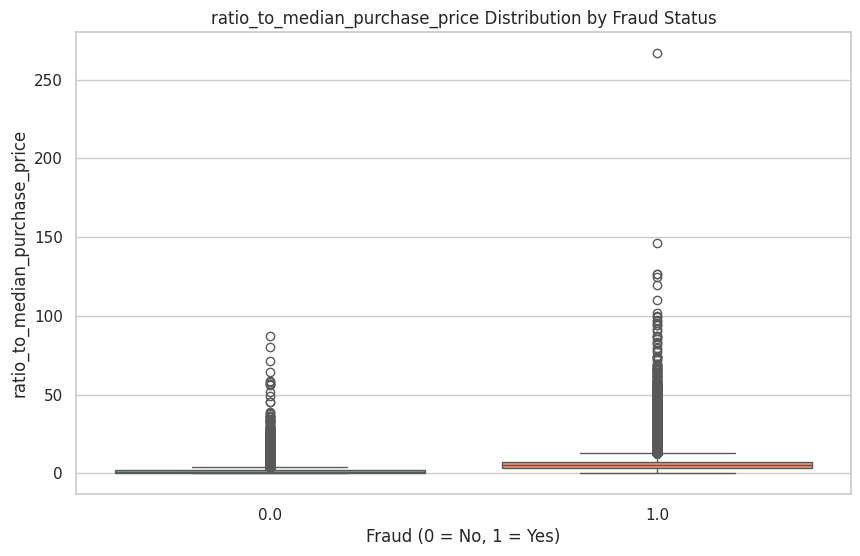

<ipython-input-14-4042422186>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=balanced_df, x='fraud', y=feature, palette='Set2')


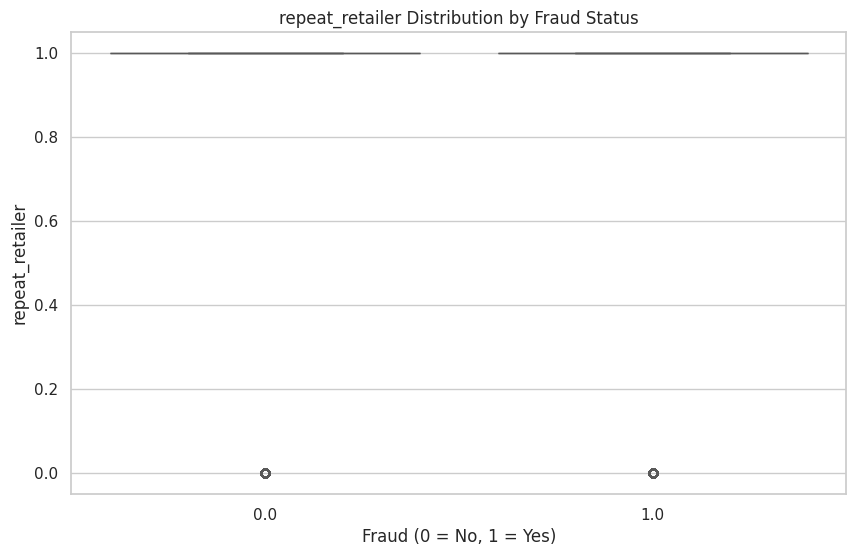

<ipython-input-14-4042422186>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=balanced_df, x='fraud', y=feature, palette='Set2')


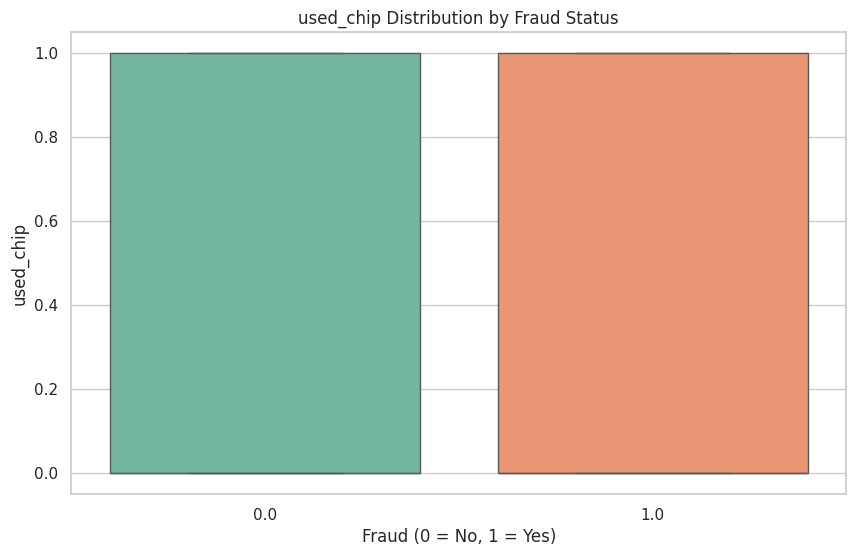

<ipython-input-14-4042422186>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=balanced_df, x='fraud', y=feature, palette='Set2')


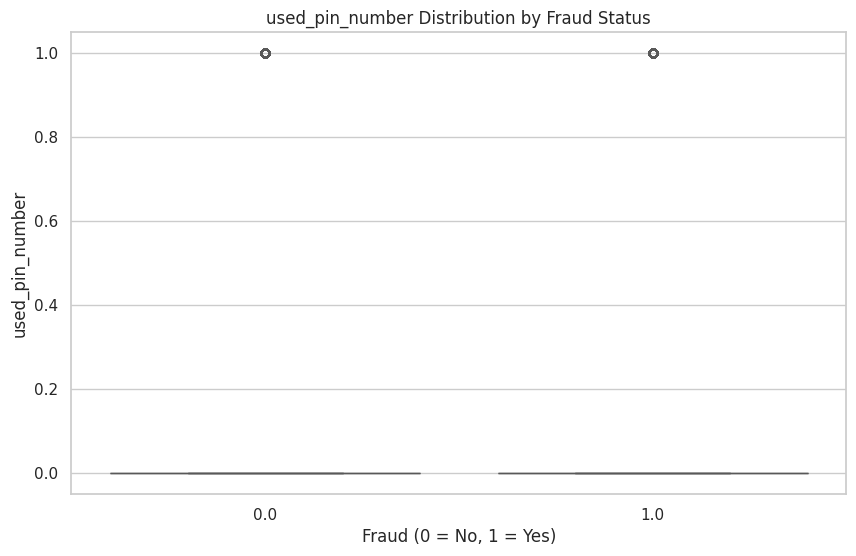

<ipython-input-14-4042422186>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=balanced_df, x='fraud', y=feature, palette='Set2')


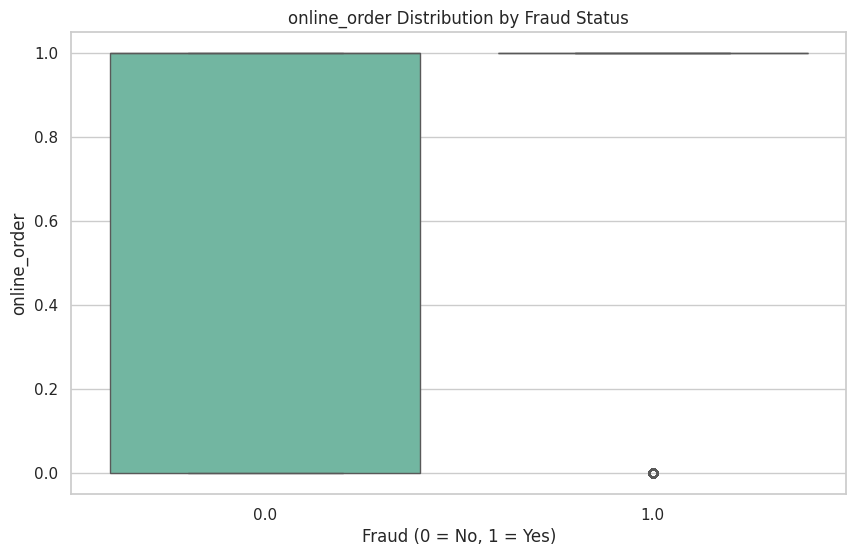

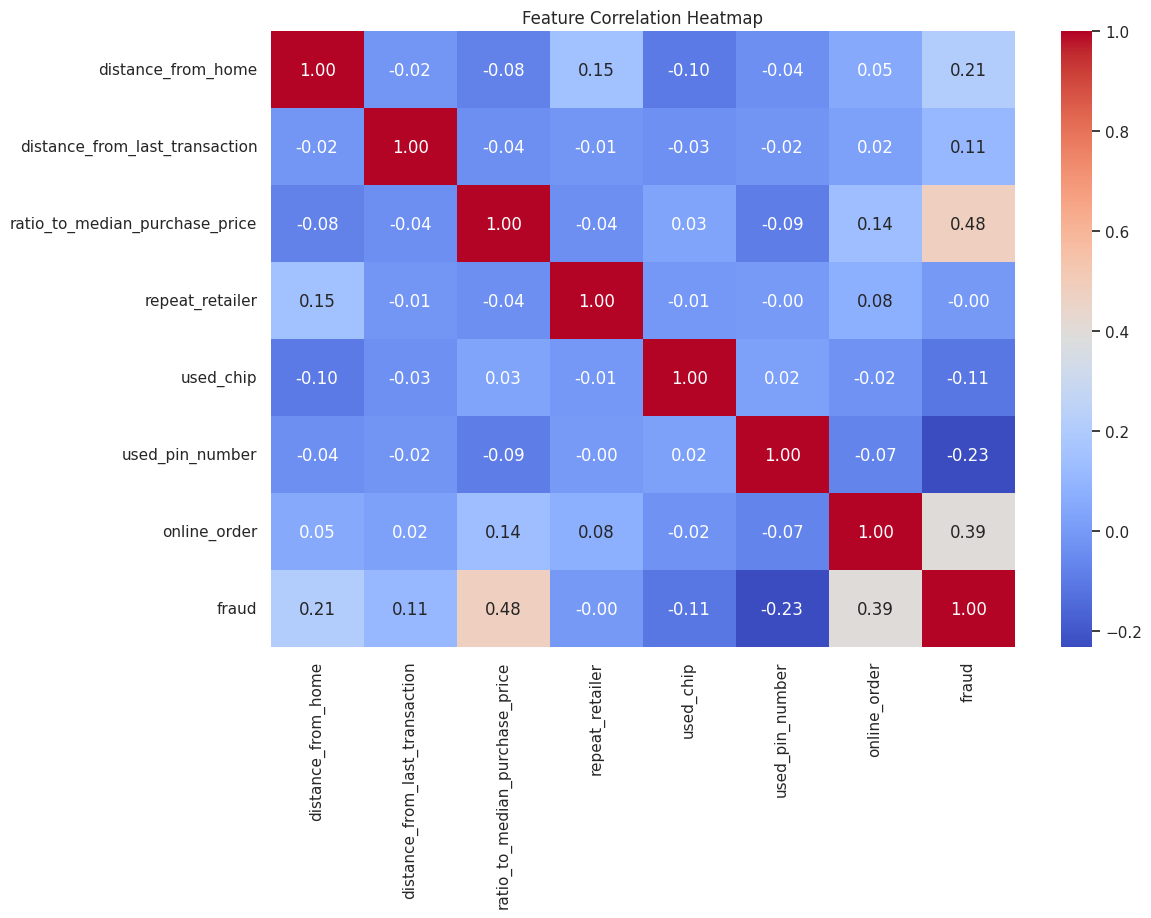

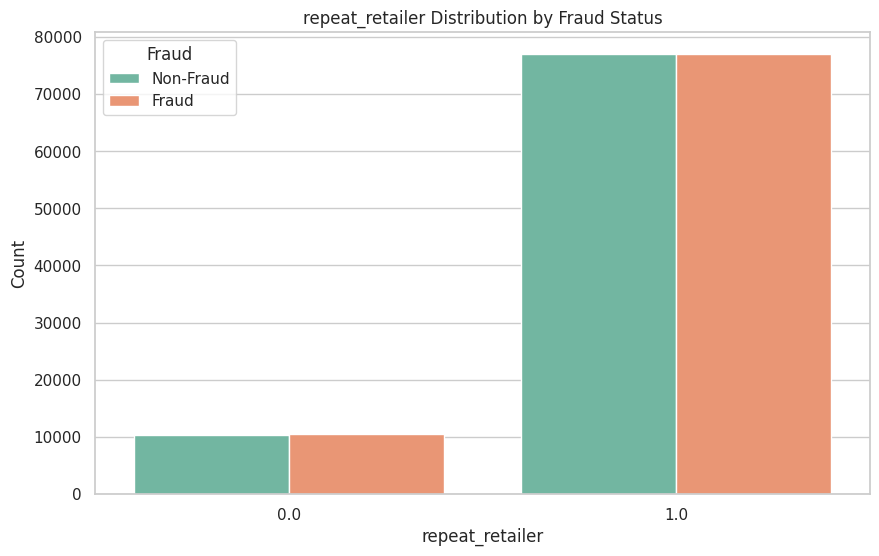

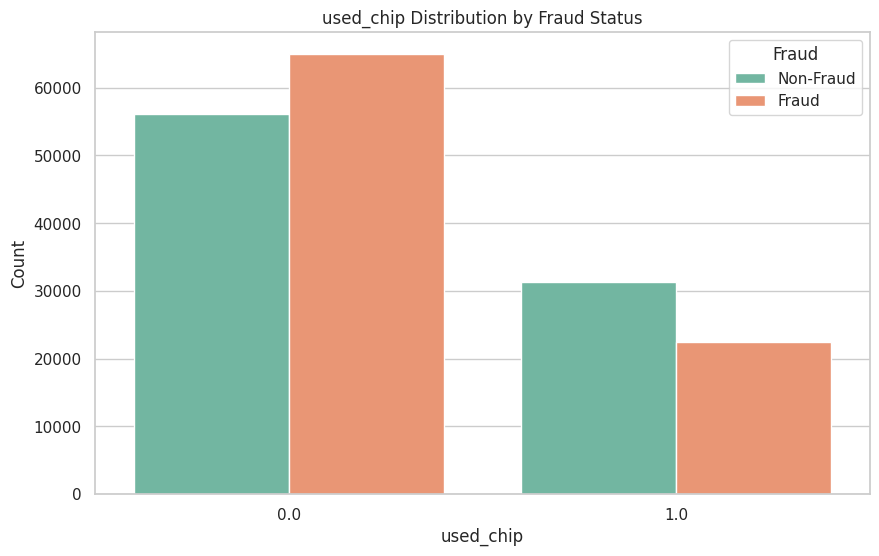

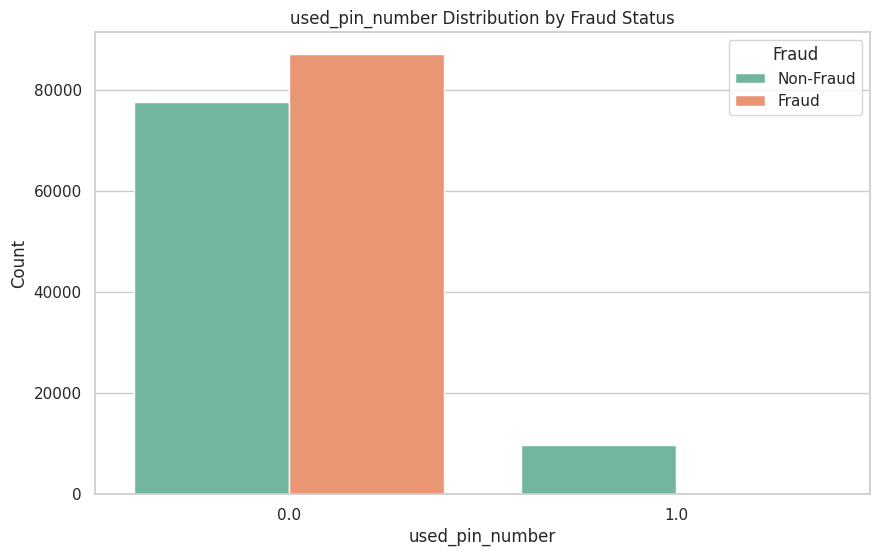

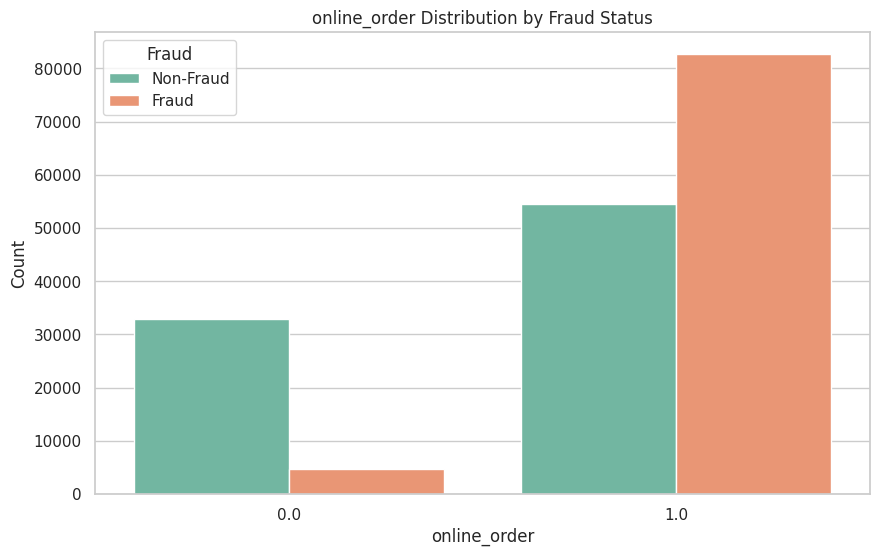

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style for seaborn
sns.set(style="whitegrid")

# Step 1: Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=balanced_df, x='fraud', palette='Set2')
# sns.countplot(data=df, x='fraud', palette='Set2')
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Step 2: Feature Distributions
features = ['distance_from_home', 'distance_from_last_transaction',
            'ratio_to_median_purchase_price', 'repeat_retailer',
            'used_chip', 'used_pin_number', 'online_order']

# Plot histograms for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=balanced_df, x=feature, hue='fraud', kde=True, bins=30, palette='coolwarm')
    plt.title(f'Distribution of {feature} by Fraud Status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
    plt.show()

# Step 3: Boxplots for Fraud vs Non-Fraud Comparisons
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=balanced_df, x='fraud', y=feature, palette='Set2')
    plt.title(f'{feature} Distribution by Fraud Status')
    plt.xlabel('Fraud (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.show()

# Step 4: Correlation Heatmap
# Compute correlation matrix
correlation_matrix = balanced_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# Step 5: Categorical Features Analysis
categorical_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

# Bar plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=balanced_df, x=feature, hue='fraud', palette='Set2')
    plt.title(f'{feature} Distribution by Fraud Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
    plt.show()

<ipython-input-15-3092870500>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fraud', palette='Set2')


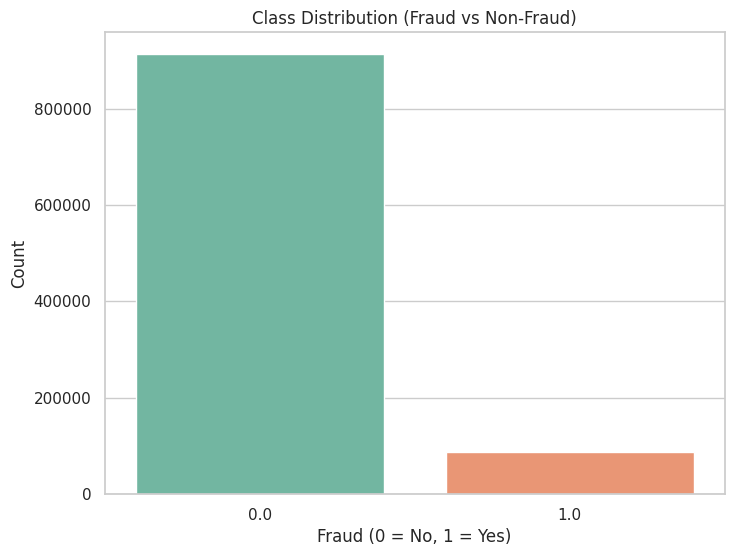

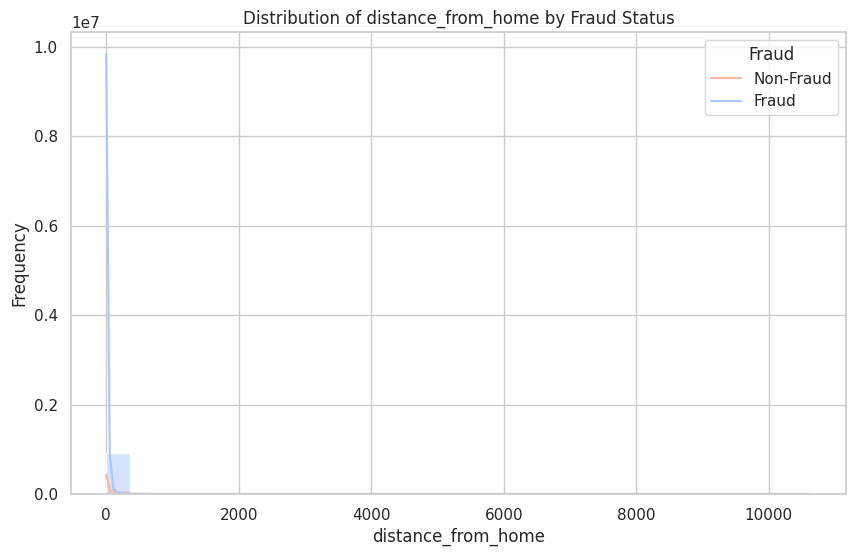

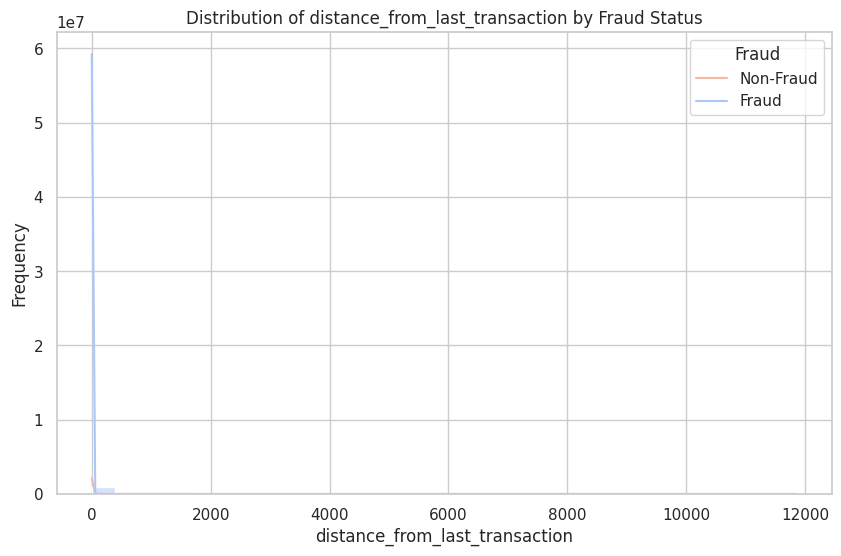

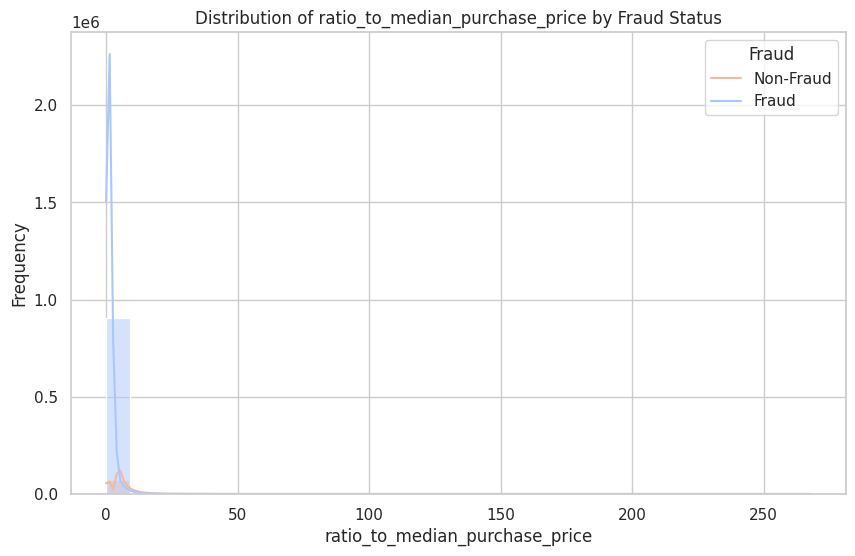

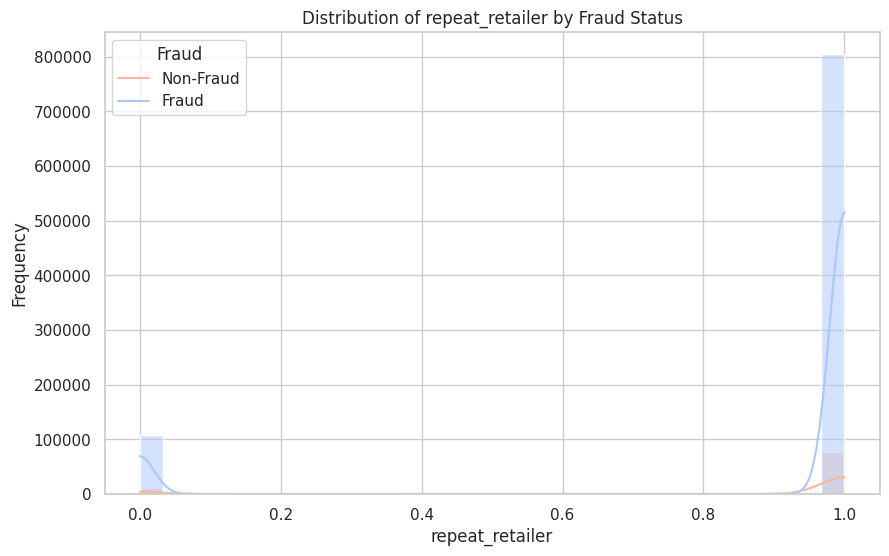

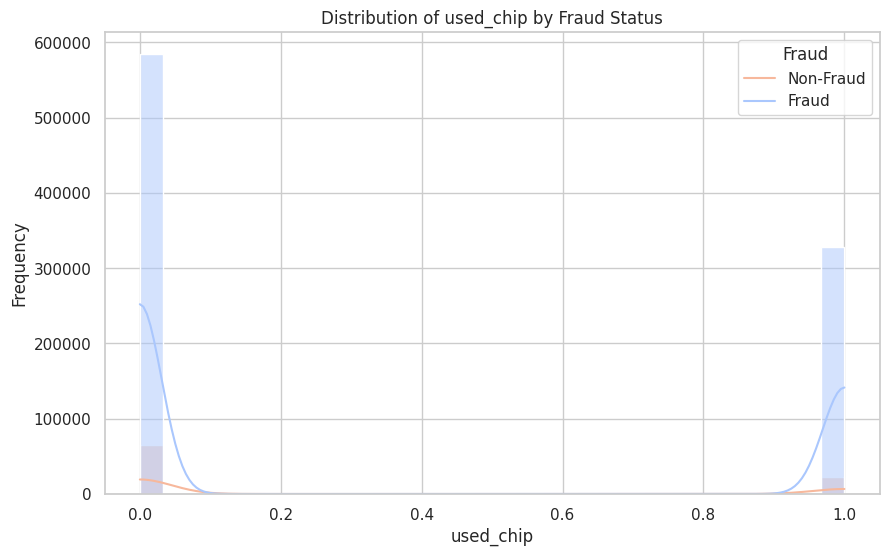

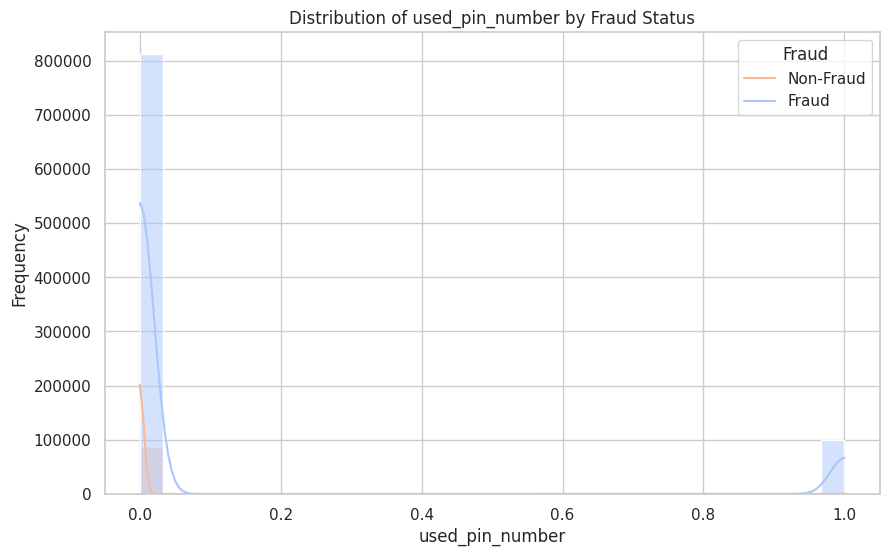

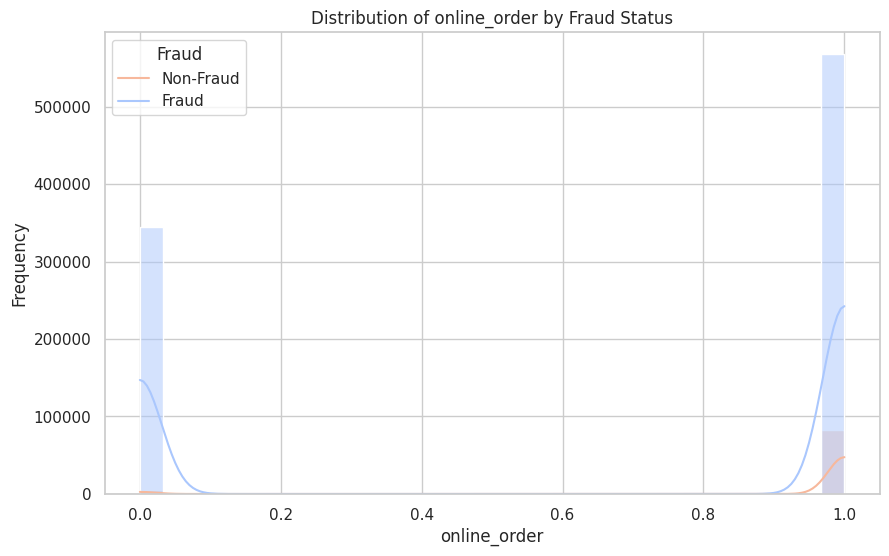

<ipython-input-15-3092870500>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud', y=feature, palette='Set2')


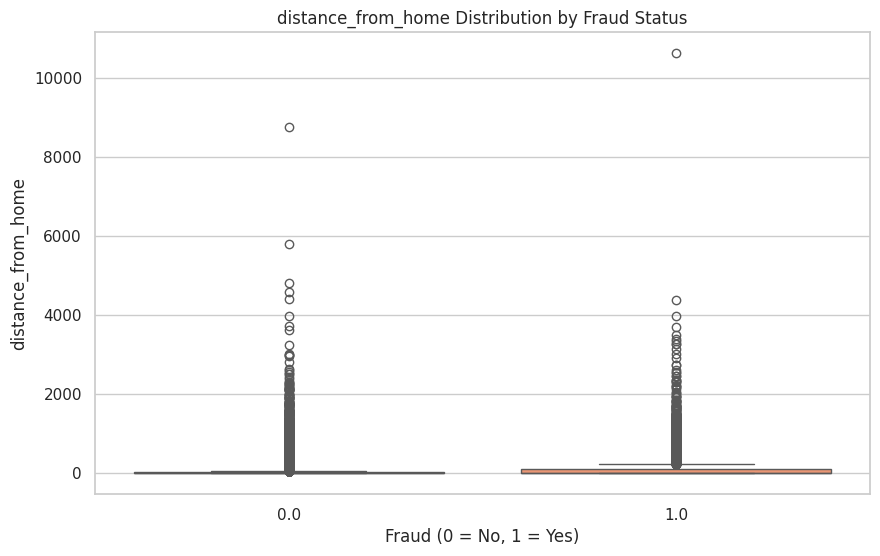

<ipython-input-15-3092870500>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud', y=feature, palette='Set2')


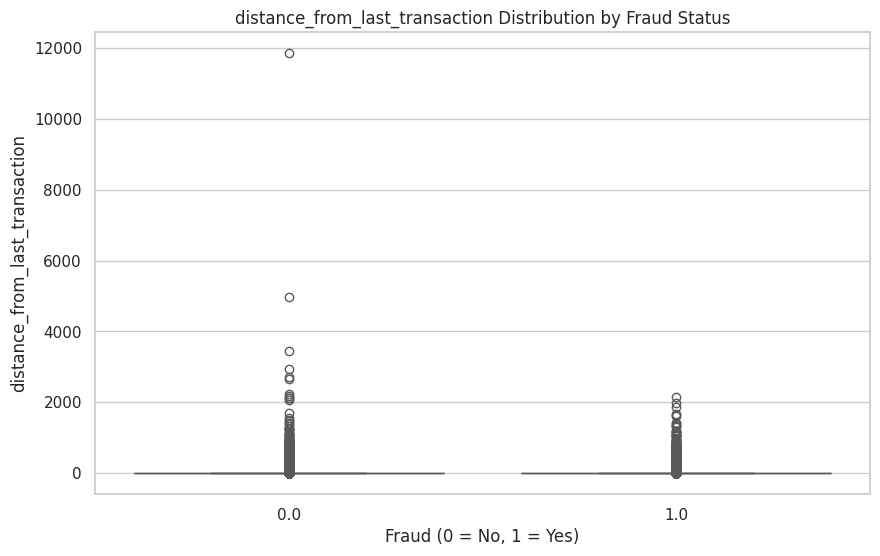

<ipython-input-15-3092870500>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud', y=feature, palette='Set2')


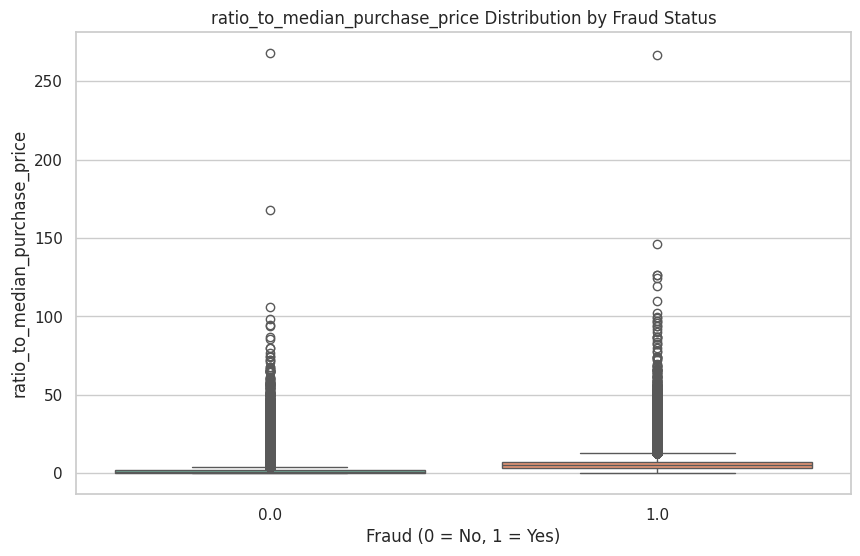

<ipython-input-15-3092870500>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud', y=feature, palette='Set2')


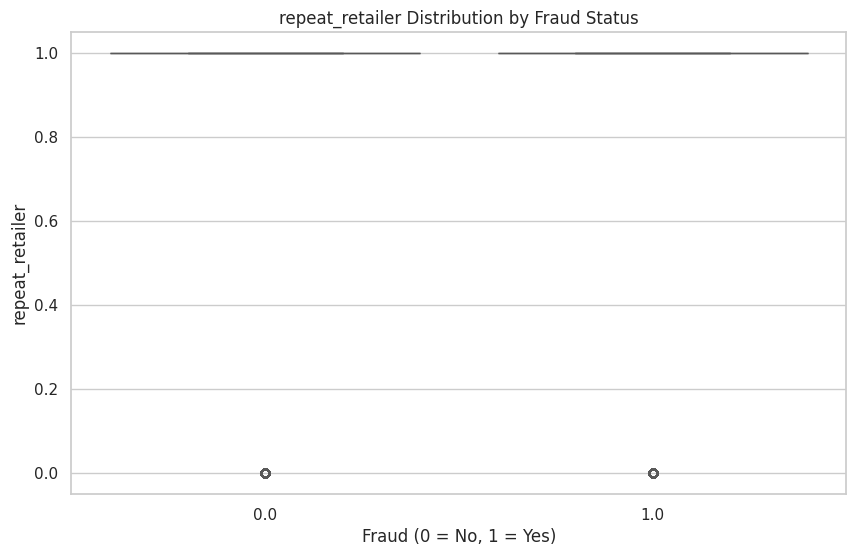

<ipython-input-15-3092870500>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud', y=feature, palette='Set2')


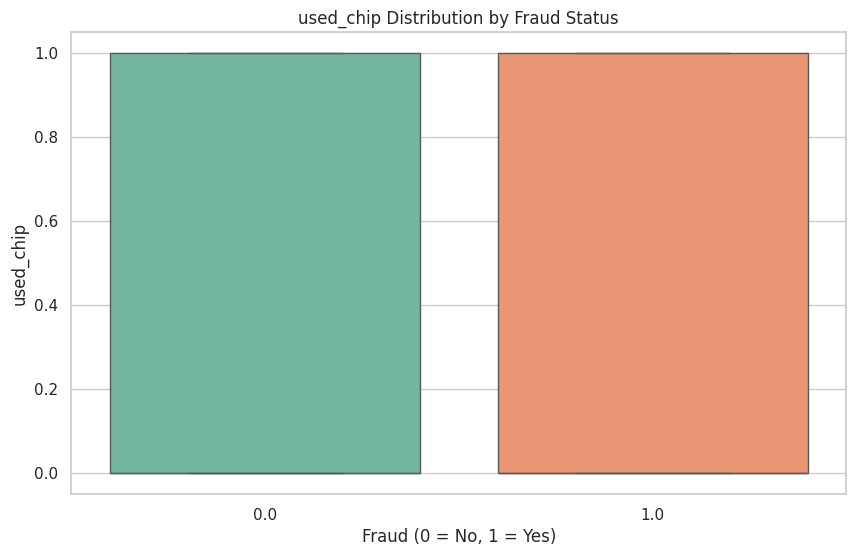

<ipython-input-15-3092870500>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud', y=feature, palette='Set2')


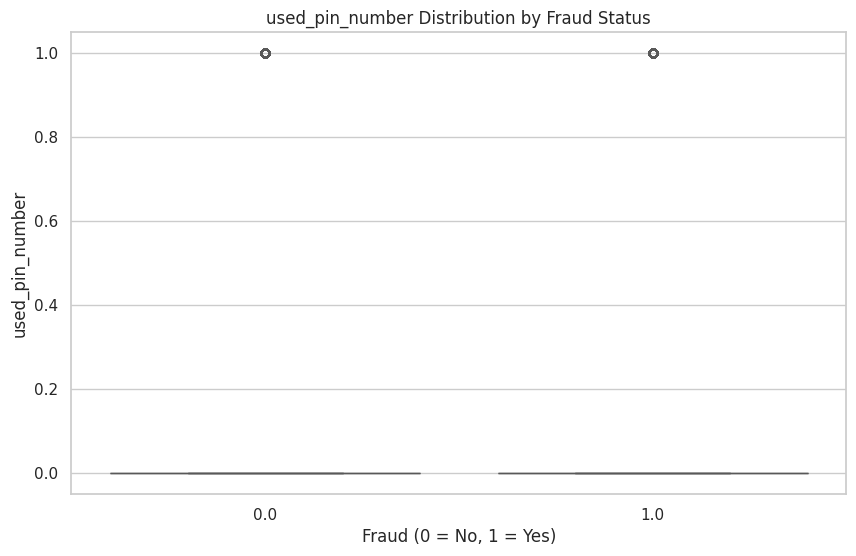

<ipython-input-15-3092870500>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fraud', y=feature, palette='Set2')


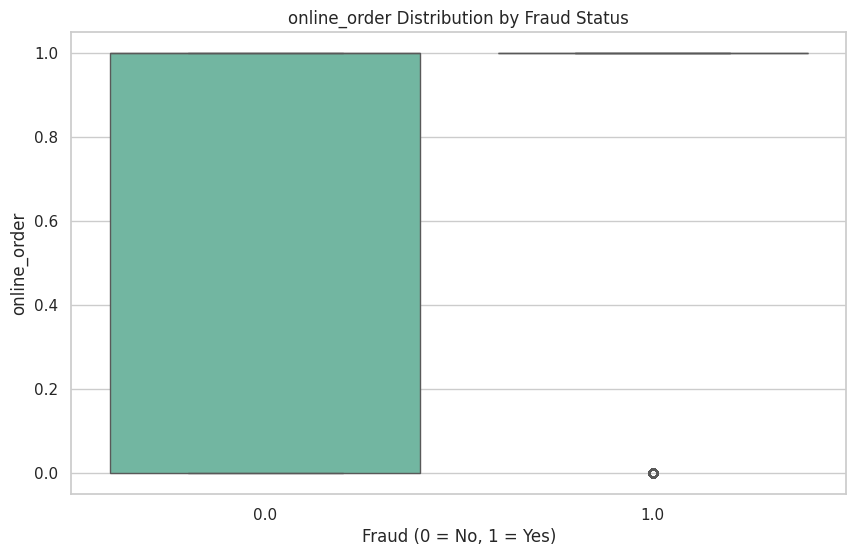

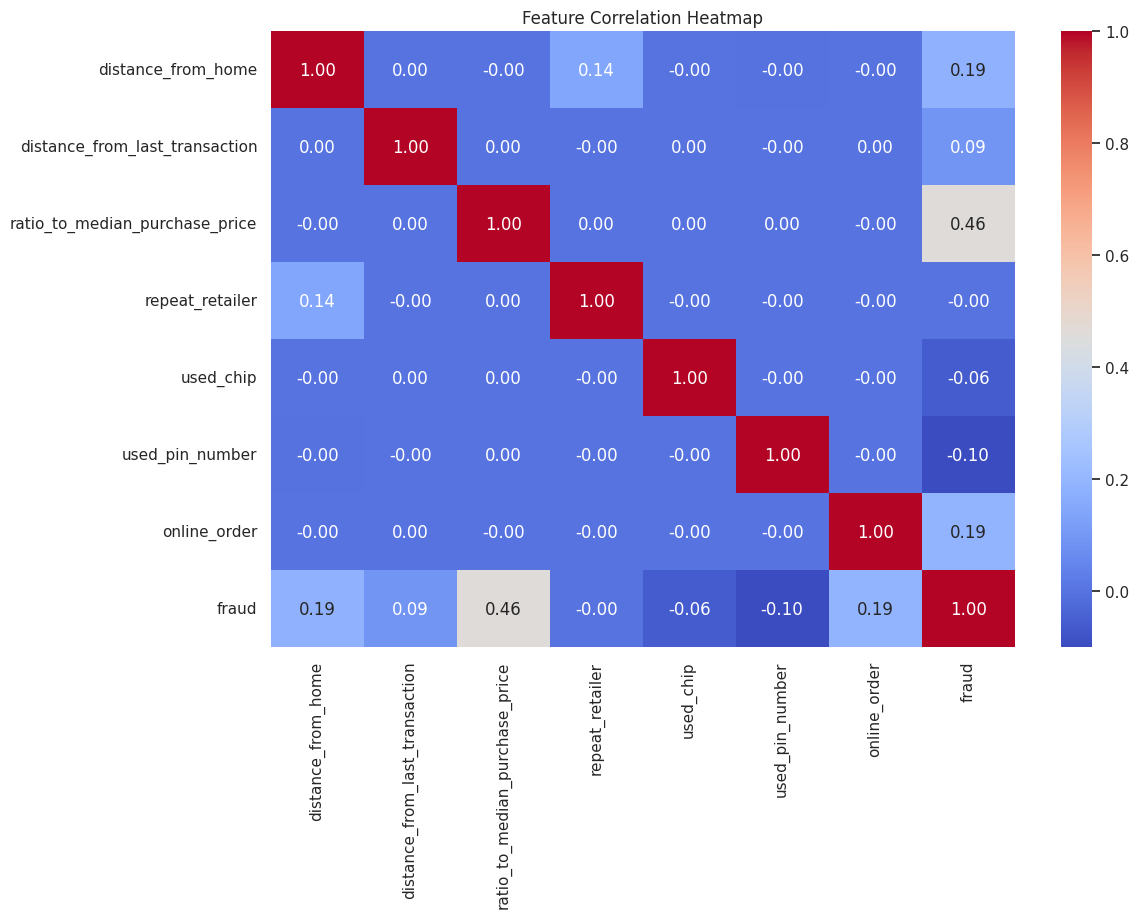

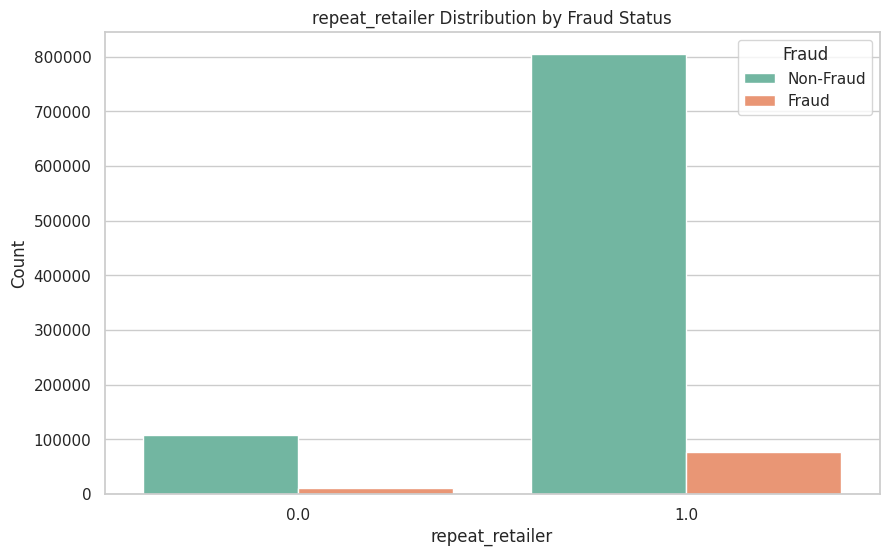

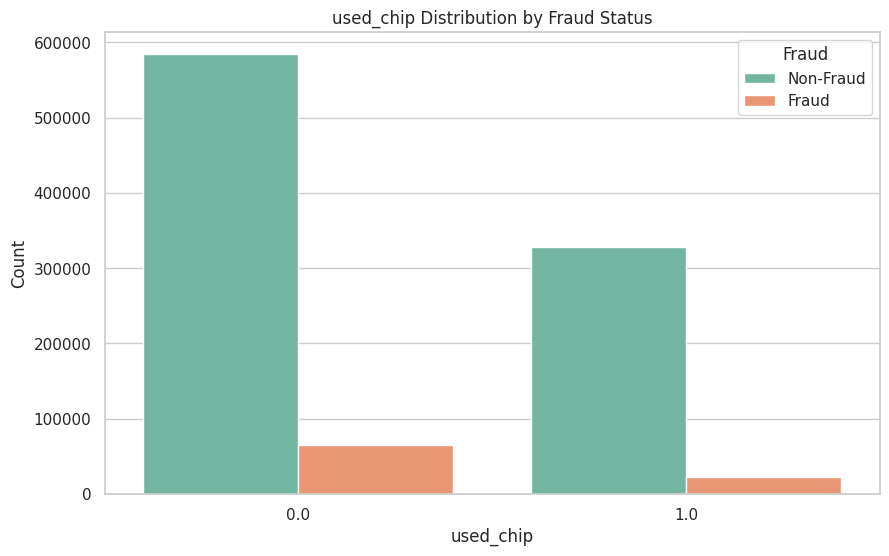

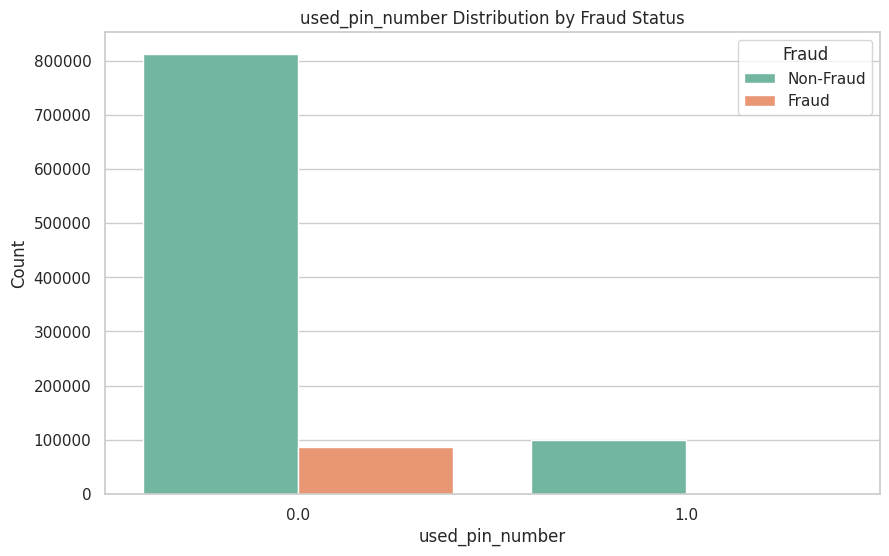

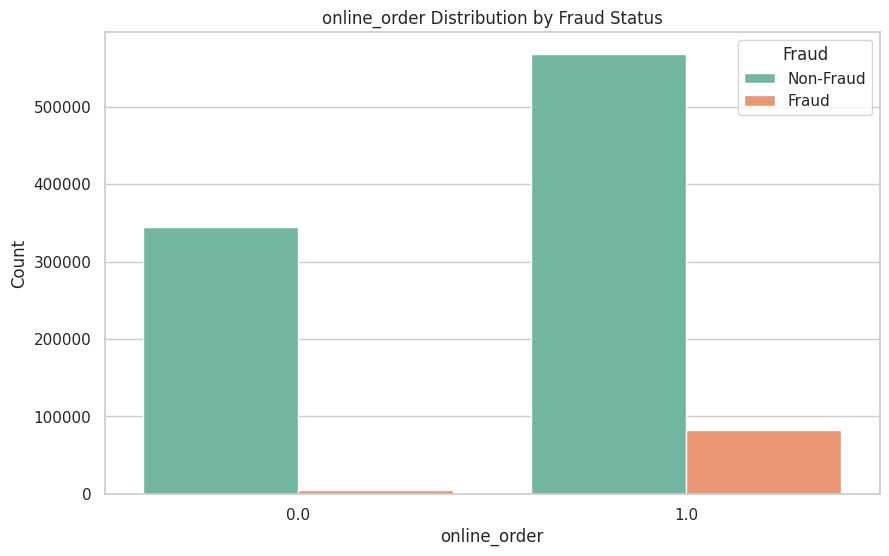

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style for seaborn
sns.set(style="whitegrid")

# Step 1: Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='fraud', palette='Set2')
# sns.countplot(data=df, x='fraud', palette='Set2')
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Step 2: Feature Distributions
features = ['distance_from_home', 'distance_from_last_transaction',
            'ratio_to_median_purchase_price', 'repeat_retailer',
            'used_chip', 'used_pin_number', 'online_order']

# Plot histograms for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='fraud', kde=True, bins=30, palette='coolwarm')
    plt.title(f'Distribution of {feature} by Fraud Status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
    plt.show()

# Step 3: Boxplots for Fraud vs Non-Fraud Comparisons
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='fraud', y=feature, palette='Set2')
    plt.title(f'{feature} Distribution by Fraud Status')
    plt.xlabel('Fraud (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.show()

# Step 4: Correlation Heatmap
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# Step 5: Categorical Features Analysis
categorical_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

# Bar plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='fraud', palette='Set2')
    plt.title(f'{feature} Distribution by Fraud Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
    plt.show()

In [21]:
online_order_counts = balanced_df['online_order'].value_counts()
print("Counts of online_order:")
print(online_order_counts)

Counts of online_order:
online_order
1.0    137137
0.0     37669
Name: count, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split

# Step 1: Split the dataset into features (X) and target (y)
X = balanced_df.drop(columns=['fraud'])  # Features
y = balanced_df['fraud']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% of the data for testing
    stratify=y,             # Ensure class distribution is preserved
    random_state=42         # For reproducibility
)

# Step 3: Apply SMOTE to the training data (optional, if not already balanced)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verify the new class distribution in the training set
print("Training Class Distribution:")
print(y_train_res.value_counts())

Training Class Distribution:
fraud
1.0    69922
0.0    69922
Name: count, dtype: int64


# Train models

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

In [17]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Train each model
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_res, y_train_res)

    # Measure inference time
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    inference_time = end_time - start_time
    average_inference_time = inference_time / len(X_test)  # Average time per sample

    # Calculate metrics (Performance)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Results for {name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print(f"  Inference Time (Total): {inference_time:.6f} seconds")
    print(f"  Inference Time (Per Sample): {average_inference_time:.6f} seconds\n")

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Inference Time (Total)': inference_time,
        'Inference Time (Per Sample)': average_inference_time
    }

Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for Logistic Regression:
  Accuracy: 0.9360
  Precision: 0.9291
  Recall: 0.9441
  F1-Score: 0.9365
  ROC-AUC: 0.9360
  Inference Time (Total): 0.002897 seconds
  Inference Time (Per Sample): 0.000000 seconds

Training Random Forest...
Results for Random Forest:
  Accuracy: 0.9999
  Precision: 0.9998
  Recall: 0.9999
  F1-Score: 0.9999
  ROC-AUC: 0.9999
  Inference Time (Total): 0.204807 seconds
  Inference Time (Per Sample): 0.000006 seconds



# Machine Unlearning

remove data from online orders to remove bias

forget set: transactions with online_order=1

retain set: transactions with online_order=0

Split the dataset into retain and forget sets based on 'online_order'

In [20]:
retain_data = balanced_df[balanced_df['online_order'] == 0]
forget_data = balanced_df[balanced_df['online_order'] == 1]

# Features and target for retain and forget sets
X_retain = retain_data.drop(columns=['fraud'])
y_retain = retain_data['fraud']

X_forget = forget_data.drop(columns=['fraud'])
y_forget = forget_data['fraud']

In [21]:
# Evaluate the original model
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

print("Original Model Performance:")
print("- Retain Set:")
print(evaluate_model(models['Random Forest'], X_retain, y_retain))
print("- Forget Set:")
print(evaluate_model(models['Random Forest'], X_forget, y_forget))

Original Model Performance:
- Retain Set:
{'Accuracy': 0.9999203589158194, 'Precision': 0.9993610223642172, 'Recall': 1.0, 'F1-Score': 0.9996804090763822, 'ROC-AUC': np.float64(0.999954513752009)}
- Forget Set:
{'Accuracy': 0.9999854160438102, 'Precision': 1.0, 'Recall': 0.9999758194194243, 'F1-Score': 0.9999879095635352, 'ROC-AUC': np.float64(0.9999879097097122)}


Apply machine unlearning

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Create a copy of the Random Forest model
model_unlearned = RandomForestClassifier(random_state=42)

# Train the model only on the retain set
print("Applying Machine Unlearning (Finetuning)")
model_unlearned.fit(X_retain, y_retain)

# Evaluate the unlearned model
print("Unlearned Model Performance:")
print("- Retain Set:")
print(evaluate_model(model_unlearned, X_retain, y_retain))
print("- Forget Set:")
print(evaluate_model(model_unlearned, X_forget, y_forget))

Applying Machine Unlearning (Finetuning)...
Unlearned Model Performance:
- Retain Set:
{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0, 'ROC-AUC': np.float64(1.0)}
- Forget Set:
{'Accuracy': 0.460503000648986, 'Precision': 0.9997709049255441, 'Recall': 0.10552405363252772, 'F1-Score': 0.19089904966043678, 'ROC-AUC': np.float64(0.552743653244809)}


The model performs poorly on the forget set (transactions with online_order = 1) after finetuning

The accuracy is close to random guessing (~0.5), indicating that the model has largely forgotten the patterns associated with online orders.



The degradation in performance on the forget set is evidence of successful unlearning

The model achieves perfect performance on the retain set but sacrifices performance on the forget set

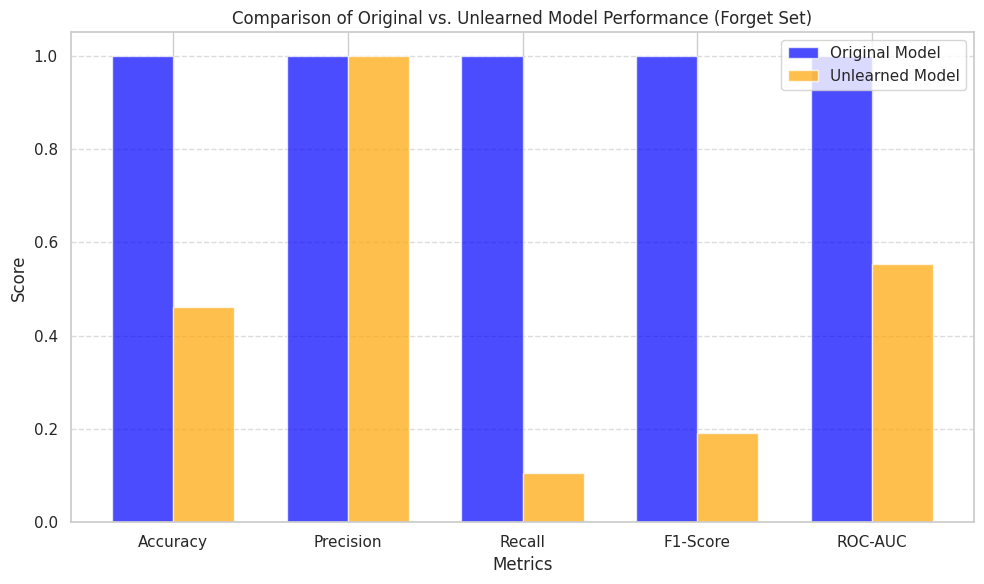

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data for original model and unlearned model performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
original_forget = [0.999985, 1.0, 0.999976, 0.999988, 0.999988]  # Original model forget set
unlearned_forget = [0.460503, 0.999771, 0.105524, 0.190899, 0.552744]  # Unlearned model forget set

x = np.arange(len(metrics))  # X-axis positions for the metrics
width = 0.35  # Width of the bars

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, original_forget, width, label='Original Model', color='blue', alpha=0.7)
plt.bar(x + width/2, unlearned_forget, width, label='Unlearned Model', color='orange', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Original vs. Unlearned Model Performance (Forget Set)')
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

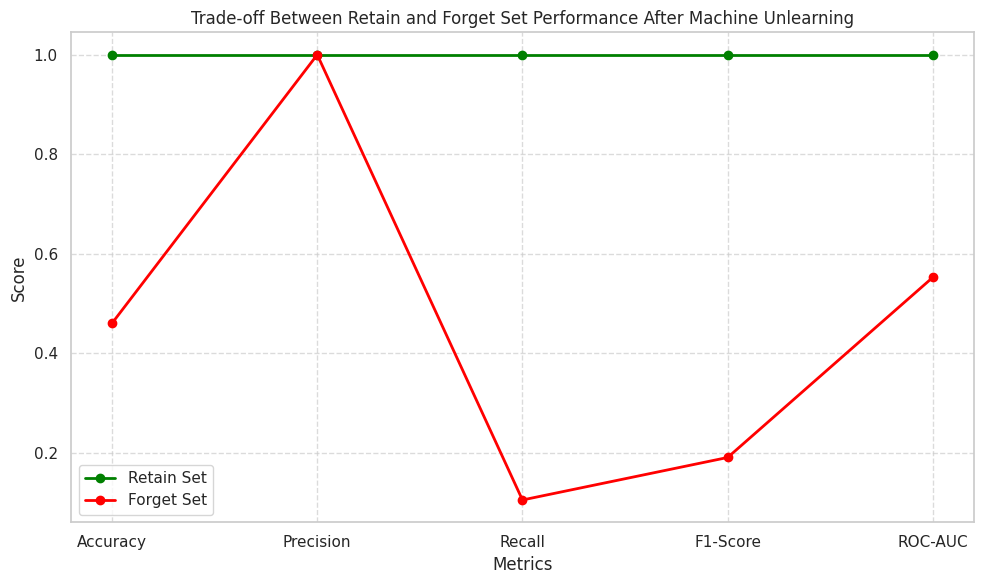

In [23]:
import matplotlib.pyplot as plt

# Data for retain and forget set performance after machine unlearning
retain_metrics = [1.0, 1.0, 1.0, 1.0, 1.0]  # Retain set performance (perfect)
forget_metrics = [0.460503, 0.999771, 0.105524, 0.190899, 0.552744]  # Forget set performance

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(metrics, retain_metrics, marker='o', label='Retain Set', color='green', linewidth=2)
plt.plot(metrics, forget_metrics, marker='o', label='Forget Set', color='red', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Trade-off Between Retain and Forget Set Performance After Machine Unlearning')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()